In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
mpl.rcParams['font.size'] = 15

# Aufgabe 11

## a)

$$
PDF(E) = \Phi(E) = \Phi_0 \cdot \left( \frac{E}{E_0} \right)^{-\gamma}
$$
$$
CDF(E) = F(E) = 1 - \left( \frac{E}{E_0} \right)^{1-\gamma}
$$
$$
PPF(u) = F^{-1}(u) = E = E_0 \cdot (1-u)^{\frac{1}{1-\gamma}}
$$

In [3]:
df = pd.DataFrame()
rng = np.random.default_rng(seed=42)

In [4]:
def PPF(u):
    return E0*(1-u)**(1/(1-gamma))

In [5]:
E0 = 1 # TeV
gamma = 2.7

In [6]:
u = rng.uniform(size=10**5)
E = PPF(u)

In [7]:
df['Energy'] = E # TeV

In [8]:
print(df)

         Energy
0      2.398206
1      1.404797
2      3.160326
3      2.019967
4      1.059909
...         ...
99995  1.200035
99996  1.654282
99997  1.620825
99998  1.078836
99999  4.812403

[100000 rows x 1 columns]


In [9]:
print(df.describe())

              Energy
count  100000.000000
mean        2.420605
std         6.644584
min         1.000008
25%         1.184831
50%         1.507774
75%         2.258361
max      1149.648577


## b)
$$
P(E) = \left( 1 - \exp\left(-\frac{E}{2} \right)\right)^3
$$

In [10]:
def P(E):
    return (1 - np.exp(-E/2))**3

In [11]:
u2 = rng.uniform(size=10**5)

In [12]:
accept_mask = P(E)>u2
df['AcceptanceMask'] = accept_mask

In [13]:
print(df)

         Energy  AcceptanceMask
0      2.398206           False
1      1.404797           False
2      3.160326           False
3      2.019967            True
4      1.059909           False
...         ...             ...
99995  1.200035           False
99996  1.654282           False
99997  1.620825           False
99998  1.078836           False
99999  4.812403            True

[100000 rows x 2 columns]


In [14]:
print(df['AcceptanceMask'].value_counts())

False    74862
True     25138
Name: AcceptanceMask, dtype: int64


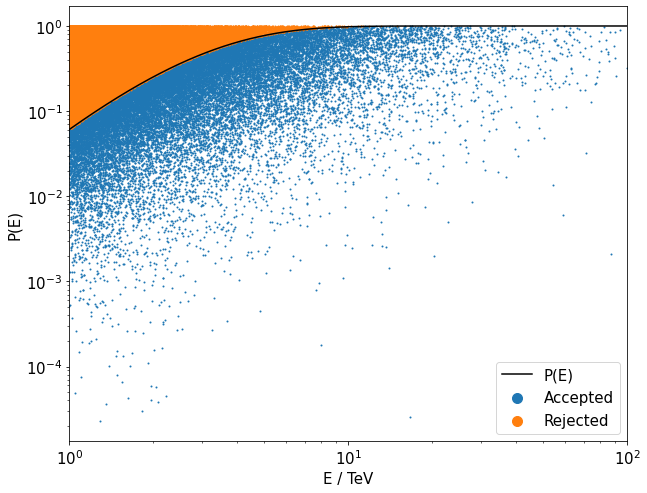

In [15]:
E_logspace = np.logspace(0,2, 10**4)

plt.figure(figsize=(10,8))

plt.scatter(E[accept_mask], u2[accept_mask], s=1, label='Accepted')
plt.scatter(E[~accept_mask], u2[~accept_mask], s=1, label='Rejected')
plt.plot(E_logspace, P(E_logspace), 'k-', label='P(E)')

plt.xlabel('E / TeV')
plt.ylabel('P(E)')

plt.xscale('log')
plt.yscale('log')

plt.xlim(10**0,10**2)

plt.legend(markerscale=10)
plt.show()

## d)

In [16]:
from project_b4.random import Generator
my_rng = Generator(seed=1234)

In [17]:
num_of_accepted = np.sum(accept_mask)
hits = np.zeros(num_of_accepted)
while np.any(hits<=0):
    hits = my_rng.normal(loc=(10*E[accept_mask]),scale=(2*E[accept_mask]),size=num_of_accepted)
    hits = np.around(hits)

hits = hits.astype(dtype=int)

In [18]:
df.loc[accept_mask,'NumberOfHits'] = hits
#df = df.astype({'NumberOfHits':int})

In [19]:
print(df)

         Energy  AcceptanceMask  NumberOfHits
0      2.398206           False           NaN
1      1.404797           False           NaN
2      3.160326           False           NaN
3      2.019967            True          21.0
4      1.059909           False           NaN
...         ...             ...           ...
99995  1.200035           False           NaN
99996  1.654282           False           NaN
99997  1.620825           False           NaN
99998  1.078836           False           NaN
99999  4.812403            True          69.0

[100000 rows x 3 columns]


In [20]:
print(df.dtypes)

Energy            float64
AcceptanceMask       bool
NumberOfHits      float64
dtype: object


In [21]:
df[ (df['NumberOfHits']<=0) & (df['AcceptanceMask']) ]

,Energy,AcceptanceMask,NumberOfHits


In [22]:
df.describe()

,Energy,NumberOfHits
count,100000.000000,25138.000000
mean,2.420605,48.240831
std,6.644584,138.088623
min,1.000008,3.000000
25%,1.184831,17.000000
50%,1.507774,27.000000
75%,2.258361,48.000000
max,1149.648577,13223.000000


## e)

In [23]:
x0, y0 = 7, 3

sigma = 1/np.log10(hits+1)
x = my_rng.normal(loc=x0,scale=sigma,size=sigma.size)
y = my_rng.normal(loc=y0,scale=sigma,size=sigma.size)

In [24]:
while np.any((x<0)|(x>10)):
    mask = (x<0)|(x>10)
    x[mask] = my_rng.normal(loc=x0,scale=sigma[mask],size=mask.sum())
    
while np.any((y<0)|(y>10)):
    mask = (y<0)|(y>10)
    y[mask] = my_rng.normal(loc=y0,scale=sigma[mask],size=mask.sum())

In [25]:
df.loc[accept_mask,'x'] = x
df.loc[accept_mask,'y'] = y

In [26]:
print(df)

         Energy  AcceptanceMask  NumberOfHits         x         y
0      2.398206           False           NaN       NaN       NaN
1      1.404797           False           NaN       NaN       NaN
2      3.160326           False           NaN       NaN       NaN
3      2.019967            True          21.0  8.080203  2.167368
4      1.059909           False           NaN       NaN       NaN
...         ...             ...           ...       ...       ...
99995  1.200035           False           NaN       NaN       NaN
99996  1.654282           False           NaN       NaN       NaN
99997  1.620825           False           NaN       NaN       NaN
99998  1.078836           False           NaN       NaN       NaN
99999  4.812403            True          69.0  7.769461  3.309134

[100000 rows x 5 columns]


In [27]:
print(df.describe())

              Energy  NumberOfHits             x             y
count  100000.000000  25138.000000  25138.000000  25138.000000
mean        2.420605     48.240831      6.997535      3.003220
std         6.644584    138.088623      0.712180      0.717898
min         1.000008      3.000000      2.954682      0.036847
25%         1.184831     17.000000      6.545946      2.548079
50%         1.507774     27.000000      7.004580      3.001669
75%         2.258361     48.000000      7.442962      3.461543
max      1149.648577  13223.000000      9.927981      6.958217


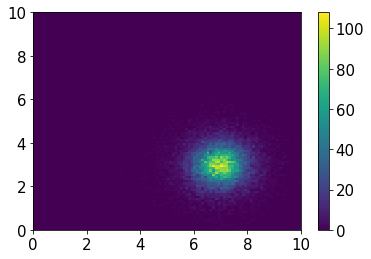

In [28]:
plt.hist2d(x, y, bins=100, range=np.array([(0, 10), (0, 10)]))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.colorbar()
plt.show()

In [29]:
df.to_hdf('NeutrinoMC.hdf5',key='Signal')

## f)

In [30]:
hits_underground = 10**my_rng.normal(loc=2,scale=1,size=10**7)
hits_underground = np.around(hits_underground)
hits_underground = hits_underground.astype(int)

In [31]:
print(hits_underground.shape)

(10000000,)


In [32]:
mu = 5
sigma = 3
rho = 0.5

x_underground_std = -np.ones(10**7)
y_underground_std = -np.ones(10**7)
x_underground = -np.ones(10**7)
y_underground = -np.ones(10**7)
mask = (x_underground<0)|(x_underground>10)|(y_underground<0)|(y_underground>10)

while np.any(mask):
    mask = (x_underground<0)|(x_underground>10)|(y_underground<0)|(y_underground>10)
    mask_size = mask.sum()
    
    x_underground_std[mask] = my_rng.standard_normal(size=mask_size)
    y_underground_std[mask] = my_rng.standard_normal(size=mask_size)
    
    x_underground[mask] = np.sqrt(1-rho**2) * sigma * x_underground_std[mask] + rho * sigma * y_underground_std[mask] + mu
    y_underground[mask] = sigma * y_underground_std[mask] + mu

In [33]:
df_underground = pd.DataFrame({
    'NumberOfHits' : hits_underground,
    'x' : x_underground,
    'y' : y_underground
    })
print(df_underground)

         NumberOfHits         x         y
0               37642  6.789504  1.536461
1                  30  1.303671  0.626660
2                1804  0.582401  3.823664
3                2397  9.538768  4.615149
4                 121  5.533221  2.545044
...               ...       ...       ...
9999995           167  5.101778  6.426912
9999996             2  5.828659  8.308851
9999997          4369  3.851760  2.680333
9999998           155  8.090290  4.491184
9999999           257  7.387833  7.361702

[10000000 rows x 3 columns]


In [34]:
print(df_underground.describe())

       NumberOfHits             x             y
count  1.000000e+07  1.000000e+07  1.000000e+07
mean   1.420045e+03  4.999738e+00  4.999951e+00
std    1.786845e+04  2.346249e+00  2.346053e+00
min    0.000000e+00  3.984602e-09  2.891966e-08
25%    2.100000e+01  3.242581e+00  3.243111e+00
50%    1.000000e+02  5.000088e+00  5.000442e+00
75%    4.720000e+02  6.757399e+00  6.756421e+00
max    1.574105e+07  9.999999e+00  9.999999e+00


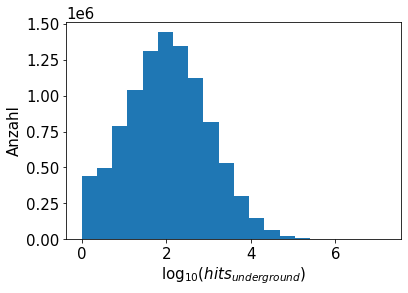

In [35]:
plt.hist(np.log10(hits_underground[hits_underground>0]),bins=20)
plt.xlabel(r'$\log_{10}({hits_{underground}})$')
plt.ylabel('Anzahl')
plt.show()

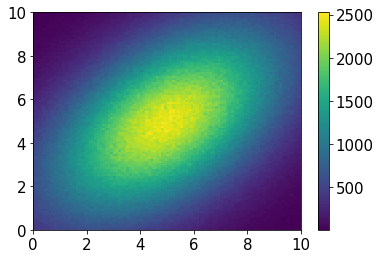

In [36]:
plt.hist2d(x_underground[hits_underground>0], y_underground[hits_underground>0], bins=100, range=np.array([(0, 10), (0, 10)]))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.colorbar()
plt.show()

In [37]:
df_underground.to_hdf('NeutrinoMC.hdf5', key='Background')